In [2]:
import numpy as np
import tensorflow as tf
import h5py
import matplotlib.pyplot as plt
from tensorflow.python.framework import ops
import tf_utils
import time

In [3]:
np.random.seed(1)

In [4]:
#创建Tensorflow变量
# 实现Tensorflow变量之间的操作定义
# 初始化Tensorflow变量
# 创建Session
# 运行Session
y_hat = tf.constant(36,name='y_hat')
y = tf.constant(39,name='y')

loss = tf.Variable((y - y_hat) ** 2 ,name = 'loss')
init = tf.global_variables_initializer()

with tf.Session() as session:
    session.run(init)
    print(session.run(loss))

9


In [5]:
a = tf.constant(2)
b = tf.constant(6)
c = tf.multiply(a,b)
print(c)

Tensor("Mul:0", shape=(), dtype=int32)


In [7]:
session = tf.Session()
print(session.run(c))

12


In [8]:
x = tf.placeholder(tf.int64,name = 'x')
print(session.run(2 * x,feed_dict={x:3}))
session.close()

6


In [9]:
# 线性函数
def linear_function():
    np.random.seed(1)
    
    X = np.random.randn(3,1)
    W = np.random.randn(4,3)
    b = np.random.randn(4,1)
    Y = tf.add(tf.matmul(W,X),b)
    
    with  tf.Session() as sess:
        result = sess.run(Y)
    
    
    return result

In [10]:
print('result=' + str(linear_function()))

result=[[-2.15657382]
 [ 2.95891446]
 [-1.08926781]
 [-0.84538042]]


In [11]:
# sigmoid函数
def sigmoid(z):
    x = tf.placeholder(tf.float32,name = 'x')
    sigmoid = tf.sigmoid(x)
    with tf.Session() as sess:
        result = sess.run(sigmoid,feed_dict={x:z})
    
    return result

In [12]:
print('sigmoid(0) = ' + str(sigmoid(0)))
print('sigmoid(12) = ' + str(sigmoid(12)))

sigmoid(0) = 0.5
sigmoid(12) = 0.9999938


In [17]:
# 独热编码
def one_hot_matrix(labels,C):
    C = tf.constant(C,name='C')
    one_hot_matrix = tf.one_hot(indices=labels,depth = C,axis = 0)
    with tf.Session() as sess:
        one_hot = sess.run(one_hot_matrix)
    
    return one_hot

In [18]:
labels = np.array([1,2,3,0,1])
one_hot = one_hot_matrix(labels,C=4)
print(one_hot)

[[0. 0. 0. 1. 0.]
 [1. 0. 0. 0. 1.]
 [0. 1. 0. 0. 0.]
 [0. 0. 1. 0. 0.]]


In [19]:
def ones(shape):
    ones = tf.ones(shape)
    with tf.Session() as sess:
        ones = sess.run(ones)
    
    return ones

In [20]:
print ("ones = " + str(ones([3])))

ones = [1. 1. 1.]


In [21]:
X_train_orig,Y_train_orig,X_test_orig,Y_test_orig,classes = tf_utils.load_dataset()

Y=1


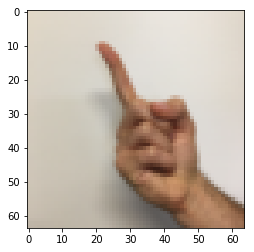

In [22]:
index = 11
plt.imshow(X_train_orig[index])
print('Y=' + str(np.squeeze(Y_train_orig[:,index])))

In [23]:
X_train_flattern = X_train_orig.reshape(X_train_orig.shape[0],-1).T
X_test_flattern = X_test_orig.reshape(X_test_orig.shape[0],-1).T

X_train = X_train_flattern/255
X_test = X_test_flattern/255

Y_train = tf_utils.convert_to_one_hot(Y_train_orig,6)
Y_test = tf_utils.convert_to_one_hot(Y_test_orig,6)

print("训练集样本数 = " + str(X_train.shape[1]))
print("测试集样本数 = " + str(X_test.shape[1]))
print("X_train.shape: " + str(X_train.shape))
print("Y_train.shape: " + str(Y_train.shape))
print("X_test.shape: " + str(X_test.shape))
print("Y_test.shape: " + str(Y_test.shape))

训练集样本数 = 1080
测试集样本数 = 120
X_train.shape: (12288, 1080)
Y_train.shape: (6, 1080)
X_test.shape: (12288, 120)
Y_test.shape: (6, 120)


In [24]:
# 创建placeholder
def create_placeholder(n_x,n_y):
    X = tf.placeholder(tf.float32,[n_x,None],name='X')
    Y = tf.placeholder(tf.float32,[n_y,None],name='Y')
    
    return X,Y

In [25]:
X,Y = create_placeholder(12288,6)
print('X= ' +str(X))
print('Y= ' +str(Y))

X= Tensor("X:0", shape=(12288, ?), dtype=float32)
Y= Tensor("Y:0", shape=(6, ?), dtype=float32)


In [26]:
# 初始化参数
def initialize_parameters():
    '''
        初始化神经网络的参数，参数的维度如下：
        W1 : [25, 12288]
        b1 : [25, 1]
        W2 : [12, 25]
        b2 : [12, 1]
        W3 : [6, 12]
        b3 : [6, 1]

    返回：
        parameters - 包含了W和b的字典
    '''
    
    
    tf.set_random_seed(1)
    
    W1 = tf.get_variable('W1',[25,12288],initializer=tf.contrib.layers.xavier_initializer(seed=1))
    b1 = tf.get_variable('b1',[25,1],initializer=tf.zeros_initializer())
    W2 = tf.get_variable('W2',[12,25],initializer=tf.contrib.layers.xavier_initializer(seed=1))
    b2 = tf.get_variable('b2',[12,1],initializer=tf.zeros_initializer())
    W3 = tf.get_variable('W3',[6,12],initializer=tf.contrib.layers.xavier_initializer(seed=1))
    b3 = tf.get_variable('b3',[6,1],initializer=tf.zeros_initializer())
    
    parameters = {
        'W1':W1,
        'b1':b1,
        'W2':W2,
        'b2':b2,
        'W3':W3,
        'b3':b3
    }
    
    return parameters

In [27]:
tf.reset_default_graph() #用于清除默认图形堆栈并重置全局默认图形。 

with tf.Session() as sess:
    parameters = initialize_parameters()
    
    print("W1 = " + str(parameters["W1"]))
    print("b1 = " + str(parameters["b1"]))
    print("W2 = " + str(parameters["W2"]))
    print("b2 = " + str(parameters["b2"]))

W1 = <tf.Variable 'W1:0' shape=(25, 12288) dtype=float32_ref>
b1 = <tf.Variable 'b1:0' shape=(25, 1) dtype=float32_ref>
W2 = <tf.Variable 'W2:0' shape=(12, 25) dtype=float32_ref>
b2 = <tf.Variable 'b2:0' shape=(12, 1) dtype=float32_ref>


In [28]:
def forward_propagation(X,parameters):
    W1 = parameters['W1']
    b1 = parameters['b1']
    W2 = parameters['W2']
    b2 = parameters['b2']
    W3 = parameters['W3']
    b3 = parameters['b3']
    
    Z1 = tf.add(tf.matmul(W1,X),b1)
    A1 = tf.nn.relu(Z1)
    Z2 = tf.add(tf.matmul(W2,A1),b2)
    A2 = tf.nn.relu(Z2)
    Z3 = tf.add(tf.matmul(W3,A2),b3)
    
    return Z3

In [29]:
tf.reset_default_graph() #用于清除默认图形堆栈并重置全局默认图形。 

with tf.Session() as sess:
    X,Y = create_placeholder(12288,6)
    parameters = initialize_parameters()
    Z3 = forward_propagation(X,parameters)
    print('Z3 = ' + str(Z3))

Z3 = Tensor("Add_2:0", shape=(6, ?), dtype=float32)


In [30]:
# 计算成本
def compute_cost(Z3,Y):
    logits = tf.transpose(Z3)
    labels = tf.transpose(Y)
    cost = tf.reduce_mean(tf.nn.softmax_cross_entropy_with_logits(logits = logits, labels = labels))
    
    return cost

In [31]:
tf.reset_default_graph() 

with tf.Session() as sess:
    X,Y = create_placeholder(12288,6)
    parameters = initialize_parameters()
    Z3 = forward_propagation(X,parameters)
    cost = compute_cost(Z3,Y)
    print('cost = ' + str(cost))
    

cost = Tensor("Mean:0", shape=(), dtype=float32)


In [32]:
# 构建模型
def model(X_train,Y_train,X_test,Y_test,learning_rate=0.0001,num_epochs = 1500,minibatch_size=32,print_cost=True,is_plot=True):
    ops.reset_default_graph()
    tf.set_random_seed(1)
    seed = 3
    (n_x,m) = X_train.shape
    n_y = Y_train.shape[0]
    costs = []
    
    X,Y = create_placeholder(n_x,n_y)
    parameters = initialize_parameters()
    Z3 = forward_propagation(X,parameters)
    cost = compute_cost(Z3,Y)
    
    optimizer = tf.train.AdamOptimizer(learning_rate=learning_rate).minimize(cost)
    init = tf.global_variables_initializer()
    
    with tf.Session() as sess:
        sess.run(init)
        for epoch in range(num_epochs):
            epoch_cost = 0
            num_minibatches = int(m / minibatch_size)
            seed = seed + 1
            minibatches = tf_utils.random_mini_batches(X_train,Y_train,minibatch_size,seed)
            
            for minibatch in minibatches:
                (minibatch_X,minibatch_Y) = minibatch
                _,minibatch_cost = sess.run([optimizer,cost],feed_dict={X:minibatch_X,Y:minibatch_Y})
                epoch_cost = epoch_cost + minibatch_cost / num_minibatches
                
            if epoch % 5 == 0:
                costs.append(epoch_cost)
                
                if print_cost and epoch % 100 == 0:
                    print('epoch = ' +str(epoch) + ' epoch_cost = ' + str(epoch_cost))
        if is_plot:
            plt.plot(np.squeeze(costs))
            plt.ylabel('cost')
            plt.xlabel('iterations (per tens)')
            plt.title('Learning rate = ' + str(learning_rate))
            plt.show()
        
        parameters = sess.run(parameters)
        print('参数已经保存了')
    
        correct_prediction = tf.equal(tf.argmax(Z3),tf.argmax(Y))
        accuracy = tf.reduce_mean(tf.cast(correct_prediction,'float'))
    
        print('训练集的准确率：',accuracy.eval({X:X_train,Y:Y_train}))
        print('测试集的准确率：',accuracy.eval({X:X_test,Y:Y_test}))
    
        return parameters

epoch = 0 epoch_cost = 1.8557018944711399
epoch = 100 epoch_cost = 1.0164577653913787
epoch = 200 epoch_cost = 0.7331023794231992
epoch = 300 epoch_cost = 0.5729389362262957
epoch = 400 epoch_cost = 0.4687735786040625
epoch = 500 epoch_cost = 0.38102111130049726
epoch = 600 epoch_cost = 0.31382677862138464
epoch = 700 epoch_cost = 0.25428046060330944
epoch = 800 epoch_cost = 0.2037993425672704
epoch = 900 epoch_cost = 0.16651199329080005
epoch = 1000 epoch_cost = 0.14093692171754257
epoch = 1100 epoch_cost = 0.10775012974486205
epoch = 1200 epoch_cost = 0.08629942504745539
epoch = 1300 epoch_cost = 0.060948541613690774
epoch = 1400 epoch_cost = 0.050934410343567535


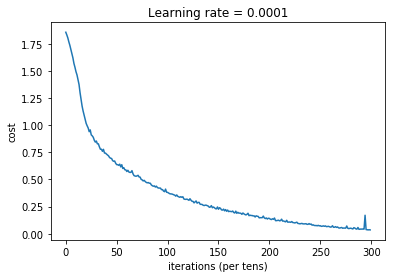

参数已经保存了
训练集的准确率： 0.9990741
测试集的准确率： 0.725
CPU的执行时间 = 804.3703099601297 秒


In [33]:
#开始时间
start_time = time.clock()
#开始训练
parameters = model(X_train, Y_train, X_test, Y_test)
#结束时间
end_time = time.clock()
#计算时差
print("CPU的执行时间 = " + str(end_time - start_time) + " 秒" )

In [ ]:
def model(X_train,Y_train,X_test,Y_test,
        learning_rate=0.0001,num_epochs=1500,minibatch_size=32,
        print_cost=True,is_plot=True):
    """
    实现一个三层的TensorFlow神经网络：LINEAR->RELU->LINEAR->RELU->LINEAR->SOFTMAX

    参数：
        X_train - 训练集，维度为（输入大小（输入节点数量） = 12288, 样本数量 = 1080）
        Y_train - 训练集分类数量，维度为（输出大小(输出节点数量) = 6, 样本数量 = 1080）
        X_test - 测试集，维度为（输入大小（输入节点数量） = 12288, 样本数量 = 120）
        Y_test - 测试集分类数量，维度为（输出大小(输出节点数量) = 6, 样本数量 = 120）
        learning_rate - 学习速率
        num_epochs - 整个训练集的遍历次数
        mini_batch_size - 每个小批量数据集的大小
        print_cost - 是否打印成本，每100代打印一次
        is_plot - 是否绘制曲线图

    返回：
        parameters - 学习后的参数

    """
    ops.reset_default_graph()                #能够重新运行模型而不覆盖tf变量
    tf.set_random_seed(1)
    seed = 3
    (n_x , m)  = X_train.shape               #获取输入节点数量和样本数
    n_y = Y_train.shape[0]                   #获取输出节点数量
    costs = []                               #成本集

    #给X和Y创建placeholder
    X,Y = create_placeholders(n_x,n_y)

    #初始化参数
    parameters = initialize_parameters()

    #前向传播
    Z3 = forward_propagation(X,parameters)

    #计算成本
    cost = compute_cost(Z3,Y)

    #反向传播，使用Adam优化
    optimizer = tf.train.AdamOptimizer(learning_rate=learning_rate).minimize(cost)

    #初始化所有的变量
    init = tf.global_variables_initializer()

    #开始会话并计算
    with tf.Session() as sess:
        #初始化
        sess.run(init)

        #正常训练的循环
        for epoch in range(num_epochs):

            epoch_cost = 0  #每代的成本
            num_minibatches = int(m / minibatch_size)    #minibatch的总数量
            seed = seed + 1
            minibatches = tf_utils.random_mini_batches(X_train,Y_train,minibatch_size,seed)

            for minibatch in minibatches:

                #选择一个minibatch
                (minibatch_X,minibatch_Y) = minibatch

                #数据已经准备好了，开始运行session
                _ , minibatch_cost = sess.run([optimizer,cost],feed_dict={X:minibatch_X,Y:minibatch_Y})

                #计算这个minibatch在这一代中所占的误差
                epoch_cost = epoch_cost + minibatch_cost / num_minibatches

            #记录并打印成本
            ## 记录成本
            if epoch % 5 == 0:
                costs.append(epoch_cost)
                #是否打印：
                if print_cost and epoch % 100 == 0:
                        print("epoch = " + str(epoch) + "    epoch_cost = " + str(epoch_cost))

        #是否绘制图谱
        if is_plot:
            plt.plot(np.squeeze(costs))
            plt.ylabel('cost')
            plt.xlabel('iterations (per tens)')
            plt.title("Learning rate =" + str(learning_rate))
            plt.show()

        #保存学习后的参数
        parameters = sess.run(parameters)
        print("参数已经保存到session。")

        #计算当前的预测结果
        correct_prediction = tf.equal(tf.argmax(Z3),tf.argmax(Y))

        #计算准确率
        accuracy = tf.reduce_mean(tf.cast(correct_prediction,"float"))

        print("训练集的准确率：", accuracy.eval({X: X_train, Y: Y_train}))
        print("测试集的准确率:", accuracy.eval({X: X_test, Y: Y_test}))

        return parameters